1. Import libraries and Dataframes
2. Create Region Location and Visuals
3. Tasks- crosscheck data
4. Create visuals and export

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#upload  orders_products_customers_merged file
df_ords_prods_custm = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Instacart Basket Analysis/02 Data/Prepared Data/orders_products_customers_merged.pkl')


In [3]:
#upload  deparment file
df_dept = pd.read_csv(r'/Users/joshd/Documents/Personal/CareerFoundry/Instacart Basket Analysis/02 Data/Prepared Data/departments_wrangled.csv', index_col = False)

In [4]:
#rename column
df_dept.rename(columns={"Unnamed: 0": "department_id"}, inplace = True)

In [5]:
#Define path
path = r'/Users/joshd/Documents/Personal/CareerFoundry/Instacart Basket Analysis'

##First and last names removed to accomodate PII data

In [6]:
df_ords_prods_custm.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spending_flag,median,ordering_flag,gender,state,age,date_joined,number_dependants,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


#3 a and b

In [7]:
northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south_states = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west_states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(northeast_states), 'region_loc'] = 'Northeast'
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(midwest_states), 'region_loc'] = 'Midwest'
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(south_states), 'region_loc'] = 'South'
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(west_states), 'region_loc'] = 'West'

In [8]:
#create subset to locate any missing values
df_nan = df_ords_prods_custm[df_ords_prods_custm['region_loc'].isnull() == True]

In [9]:
df_nan

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,median,ordering_flag,gender,state,age,date_joined,number_dependants,family_status,income,region_loc


In [10]:
df_ords_prods_custm.head

<bound method NDFrame.head of           product_id                product_name  aisle_id  department_id  \
0                  1  Chocolate Sandwich Cookies        61             19   
1                  1  Chocolate Sandwich Cookies        61             19   
2                907        Premium Sliced Bacon       106             12   
3                907        Premium Sliced Bacon       106             12   
4               1000                    Apricots        18             10   
...              ...                         ...       ...            ...   
32404854       49235         Organic Half & Half        53             16   
32404855       49520      Orange Sparkling Water       115              7   
32404856       49520      Orange Sparkling Water       115              7   
32404857       49520      Orange Sparkling Water       115              7   
32404858       49520      Orange Sparkling Water       115              7   

          prices  order_id  user_id  order_nu

In [11]:
#Cross with spending habits
spend_region = pd.crosstab(df_ords_prods_custm['region_loc'],df_ords_prods_custm['spending_flag'], dropna= False)

In [12]:
spend_region

spending_flag,High spender,Low spender
region_loc,,
Midwest,155961,7441364
Northeast,108218,5614518
South,209691,10582194
West,160340,8132573


Text(0.5, 1.0, 'Spending by Region')

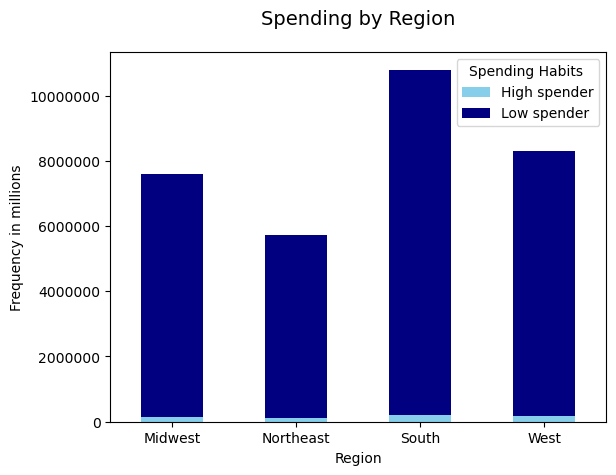

In [13]:
#Create bar
spend_region_bar =spend_region.plot.bar(stacked = 'true', color = ['skyblue','navy'])
plt.xlabel('Region'),
spend_region_bar.legend(title = 'Spending Habits '),
plt.xticks(ha = 'center',rotation_mode='anchor',rotation = 0)
plt.ylabel('Frequency in millions'),
plt.ticklabel_format(style='plain', axis='y'),
plt.title('Spending by Region', fontsize = 14, pad=20)

In [14]:
#save bar grapgh
spend_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spend_region_bar.png'))

#4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample

In [15]:
#create activity flag filter 
df_ords_prods_custm.loc[df_ords_prods_custm['max_order']>= 5, 'activity_flag'] = 'High Activity'

In [16]:
df_ords_prods_custm['activity_flag'].value_counts(dropna = False)

High Activity    30964564
NaN               1440295
Name: activity_flag, dtype: int64

In [17]:
df_high = df_ords_prods_custm[df_ords_prods_custm['activity_flag']== 'High Activity']

In [18]:
df_high.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,ordering_flag,gender,state,age,date_joined,number_dependants,family_status,income,region_loc,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity


In [19]:
df_ords_prods_custm.loc[df_ords_prods_custm['max_order'] < 5, 'activity_flag'] = 'Low Activity'

In [20]:
#create a subset for low activity customers
df_low = df_ords_prods_custm[df_ords_prods_custm['activity_flag'] == 'Low Activity']

In [21]:
df_low.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,ordering_flag,gender,state,age,date_joined,number_dependants,family_status,income,region_loc,activity_flag
340,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Low Activity
341,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Low Activity
342,3260,Chips Ahoy!/Nutter Butter/Oreo Cookies,61,19,1.7,652770,764,1,3,13,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Low Activity
343,3260,Chips Ahoy!/Nutter Butter/Oreo Cookies,61,19,1.7,705212,764,2,2,10,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Low Activity
344,3260,Chips Ahoy!/Nutter Butter/Oreo Cookies,61,19,1.7,1813452,764,3,4,17,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Low Activity


In [22]:
# Export data of order numbers greather than 5 as pkl
df_high.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

#5 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#check age

In [23]:
df_high['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [24]:
#create age categories
df_high.loc[df_high['age'] < 40, 'age_category'] = 'Youth'
df_high.loc[(df_high['age'] > 39) & (df_high['age'] <65), 'age_category'] = 'Middle Age' 
df_high.loc[df_high['age'] >=65, 'age_category'] = 'Senior'
df_high['age_category'].value_counts()

/var/folders/zd/y4z70xmn2d94glcjkm8h150h0000gn/T/ipykernel_11101/2468080926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['age'] < 40, 'age_category'] = 'Youth'


Middle Age    12103910
Youth         10665110
Senior         8195544
Name: age_category, dtype: int64

Text(0, 0.5, 'Frequency in Millions')

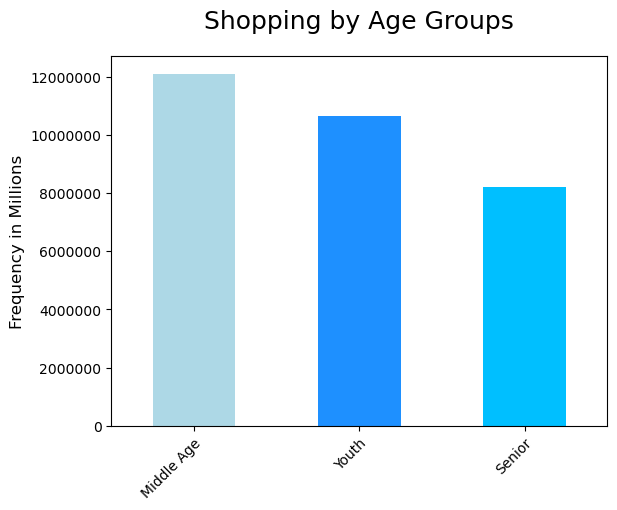

In [25]:
#create bar chart of shopping by age
bar_age = df_high['age_category'].value_counts().plot.bar(color =['lightblue','dodgerblue','deepskyblue'])
plt.xticks(ha = 'right',rotation_mode='anchor',rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Shopping by Age Groups', fontsize = 18, pad=20)
plt.ylabel('Frequency in Millions', fontsize = 12)

#check income

In [26]:
df_high['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

lowest income is $25,903 and highest is $593,901, based on description will creat low, medium, and high incomes
<70,000 is low
70,000 - 130,000 is middle
>130,000 is high

In [27]:
#create income categories
df_high.loc[df_high['income']< 70000,'income_flag'] = 'Low'
df_high.loc[(df_high['income']>= 70000) & (df_high['income']< 130000), 'income_flag'] = 'Middle'
df_high.loc[df_high['income']>= 130000,'income_flag'] = 'High'
df_high['income_flag'].value_counts()

/var/folders/zd/y4z70xmn2d94glcjkm8h150h0000gn/T/ipykernel_11101/3990525567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['income']< 70000,'income_flag'] = 'Low'


Middle    15042617
Low        8520533
High       7401414
Name: income_flag, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Middle'), Text(1, 0, 'Low'), Text(2, 0, 'High')])

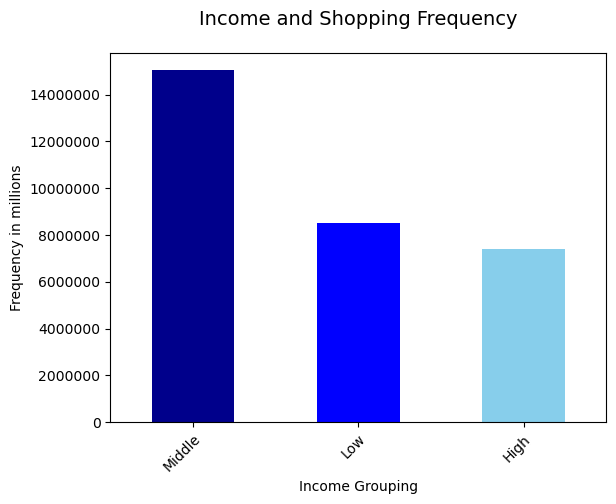

In [28]:
#Create bar
bar_income = df_high['income_flag'].value_counts().plot.bar(color = ['darkblue','blue','skyblue'])

plt.xlabel('Income Grouping'),
plt.ylabel('Frequency in millions'),
plt.ticklabel_format(style='plain', axis='y'),
plt.title('Income and Shopping Frequency', fontsize = 14, pad=20)
plt.xticks(ha = 'right',rotation_mode='anchor',rotation = 45)

In [29]:
#save histogram
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'))

In [30]:
df_high['income_flag'].describe()

count     30964564
unique           3
top         Middle
freq      15042617
Name: income_flag, dtype: object

In [31]:
#crosstab income with categories by regions
crosstab_income_region = pd.crosstab (df_high['region_loc'],df_high['income_flag'], dropna = False)

In [32]:
crosstab_income_region

income_flag,High,Low,Middle
region_loc,,,
Midwest,1763002,1974266,3524245
Northeast,1308807,1486808,2669070
South,2442801,2849538,5018800
West,1886804,2209921,3830502


(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Midwest'),
  Text(3, 0, 'Northeast')])

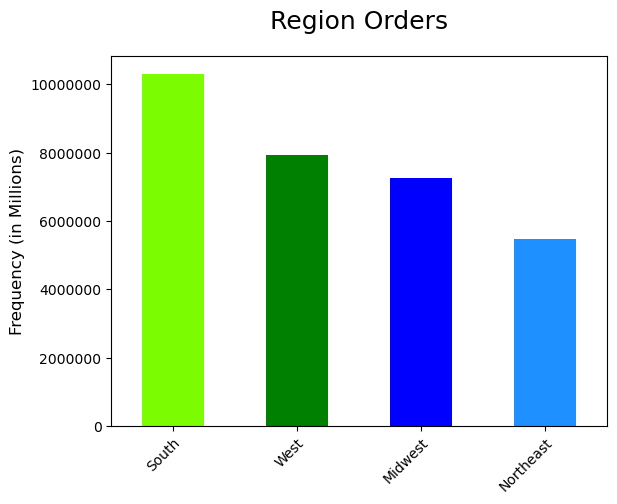

In [33]:
#create bar chart based on regions
bar_regions = df_high['region_loc'].value_counts().plot.bar(color = ['lawngreen','green','blue','dodgerblue'])
plt.title('Region Orders', fontsize = 18, pad=20)
plt.ylabel('Frequency (in Millions)', fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ha = 'right', rotation = 45, rotation_mode = 'anchor')

In [34]:
#Save bar- south has the most orders
bar_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regions.png'))

In [35]:
df_high['region_loc'].describe()

count     30964564
unique           4
top          South
freq      10311139
Name: region_loc, dtype: object

In [36]:
#dependents
df_high['number_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_dependants, dtype: float64

In [37]:
#create child categories
df_high.loc[df_high['number_dependants']< 1,'child_flag'] = 'No Children'
df_high.loc[df_high['number_dependants']> 1,'child_flag']  = 'Children'
df_high['child_flag'].value_counts()

/var/folders/zd/y4z70xmn2d94glcjkm8h150h0000gn/T/ipykernel_11101/197270007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['number_dependants']< 1,'child_flag'] = 'No Children'


Children       15505777
No Children     7739681
Name: child_flag, dtype: int64

Text(0.5, 1.0, 'Dependants ')

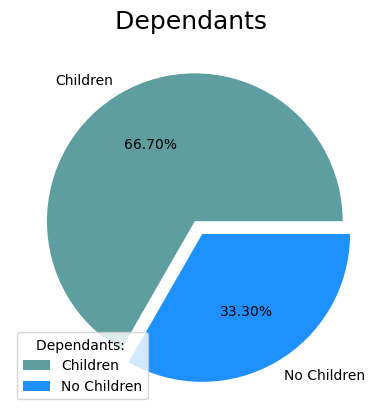

In [38]:
#create pie chart based on children
pie_children = df_high['child_flag'].value_counts().plot.pie(labels = ['Children','No Children'], autopct=('%.2f%%'), colors = ['cadetblue', 'dodgerblue'], label = '', explode = [0,0.1])
pie_children.legend(title = 'Dependants: ', loc = 'lower left')
plt.title("Dependants ", fontsize = '18')

In [39]:
#save bar graph- majoirty of shoppers have children/dependants
pie_children.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_children.png'))

In [40]:
#compare family status with deps
crosstab_family = pd.crosstab (df_high['family_status'],df_high['number_dependants'], dropna = False)

In [41]:
crosstab_family

number_dependants,0,1,2,3
family_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


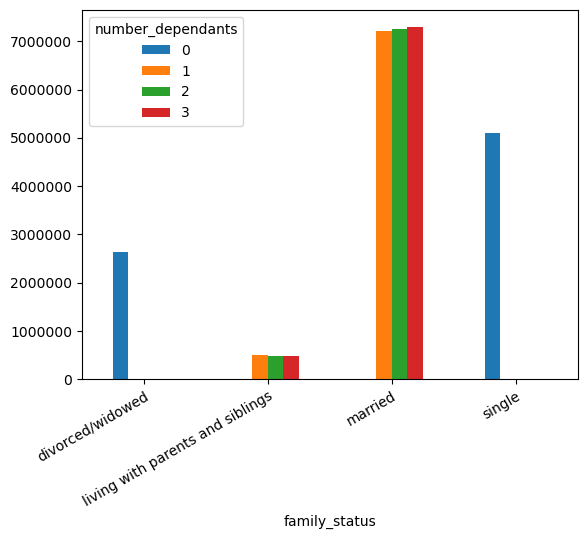

In [42]:
#show bar
barplot_family = crosstab_family.plot.bar(rot=0)
plt.xticks(ha = 'right',rotation_mode='anchor',rotation = 30)
plt.ticklabel_format(style='plain', axis='y')

In [43]:
#save bar chart
barplot_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barplot_family.png'))

In [44]:
#compare family status with deps
crosstab_family_2 = pd.crosstab (df_high['family_status'],df_high['child_flag'], dropna = False)

In [45]:
crosstab_family_2

child_flag,Children,No Children
family_status,,
divorced/widowed,0,2645271
living with parents and siblings,973127,0
married,14532650,0
single,0,5094410


#only married and people living with parents/sibling have children

In [46]:
#looking at income and dependants- high income singles profile
df_high.loc[(df_high['family_status'] == 'single') & (df_high['income_flag'] == 'High'), 'profile_age'] = 'high-income single adult'

/var/folders/zd/y4z70xmn2d94glcjkm8h150h0000gn/T/ipykernel_11101/1353795743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[(df_high['family_status'] == 'single') & (df_high['income_flag'] == 'High'), 'profile_age'] = 'high-income single adult'


In [47]:
#mid income singles profile
df_high.loc[(df_high['family_status'] == 'single') & (df_high['income_flag'] == 'Middle'), 'profile_age'] = 'mid-income single adult'

In [48]:
#low income single adult
df_high.loc[(df_high['family_status'] == 'single') & (df_high['income_flag'] == 'Low'), 'profile_age'] = 'low-income single adult'

In [49]:
#high income married adults
df_high.loc[(df_high['family_status'] == 'married') & (df_high['income_flag'] == 'High'), 'profile_age'] = 'high-income married adult'

In [50]:
#mid income married adults
df_high.loc[(df_high['family_status'] == 'married') & (df_high['income_flag'] == 'Middle'), 'profile_age'] = 'mid-income married adult'

In [51]:
#low income married adults
df_high.loc[(df_high['family_status'] == 'married') & (df_high['income_flag'] == 'Low'), 'profile_age'] = 'low-income married adult'

In [52]:
#high income divored/widowed adults
df_high.loc[(df_high['family_status'] == 'divorced/widowed') & (df_high['income_flag'] == 'High'), 'profile_age'] = 'high-income divorced or widowed  adult'

In [53]:
#mid income divored/widowed adults
df_high.loc[(df_high['family_status'] == 'divorced/widowed') & (df_high['income_flag'] == 'Middle'), 'profile_age'] = 'mid-income divorced or widowed  adult'

In [54]:
#low income divored/widowed adults
df_high.loc[(df_high['family_status'] == 'divorced/widowed') & (df_high['income_flag'] == 'Low'), 'profile_age'] = 'low-income divorced or widowed  adult'

In [55]:
#high income living with sibling/parents adults
df_high.loc[(df_high['family_status'] == 'living with parents or siblings') & (df_high['income_flag'] == 'High'), 'profile_age'] = 'high-income living siblings or parent adult'

In [56]:
#middle income living with sibling/parents adults
df_high.loc[(df_high['family_status'] == 'living with parents or siblings') & (df_high['income_flag'] == 'Middle'), 'profile_age'] = 'mid-income living siblings or parent adult'

In [57]:
#low income living with sibling/parents adults
df_high.loc[(df_high['family_status'] == 'living with parents or siblings') & (df_high['income_flag'] == 'Low'), 'profile_age'] = 'low-income living siblings or parent adult'

In [58]:
df_high['profile_age'] = df_high['profile_age'].fillna('other')

/var/folders/zd/y4z70xmn2d94glcjkm8h150h0000gn/T/ipykernel_11101/3310746314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high['profile_age'] = df_high['profile_age'].fillna('other')


In [59]:
df_high['profile_age'].value_counts(dropna = False)

mid-income married adult                  10587961
low-income married adult                   5647332
high-income married adult                  5508418
mid-income single adult                    2415291
low-income single adult                    1779765
other                                      1481172
mid-income divorced or widowed  adult      1317279
high-income divorced or widowed  adult      975936
high-income single adult                    899354
low-income divorced or widowed  adult       352056
Name: profile_age, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'low-income divorced or widowed  adult'),
  Text(1, 0, 'high-income single adult'),
  Text(2, 0, 'high-income divorced or widowed  adult'),
  Text(3, 0, 'mid-income divorced or widowed  adult'),
  Text(4, 0, 'other'),
  Text(5, 0, 'low-income single adult'),
  Text(6, 0, 'mid-income single adult'),
  Text(7, 0, 'high-income married adult'),
  Text(8, 0, 'low-income married adult'),
  Text(9, 0, 'mid-income married adult')])

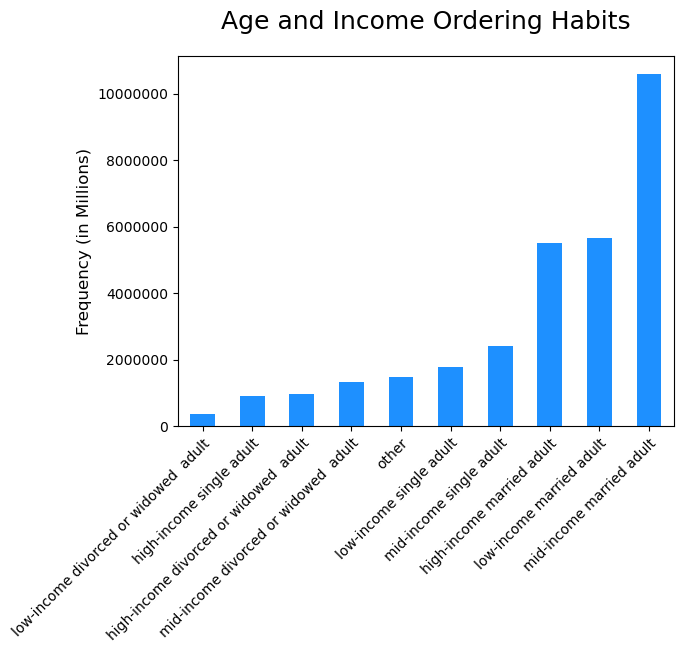

In [60]:
# show bar
bar_profile_age = df_high['profile_age'].value_counts().sort_values().plot.bar(color = 'dodgerblue')
plt.title('Age and Income Ordering Habits', fontsize = 18, pad=20)
plt.ylabel('Frequency (in Millions)', fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ha = 'right',rotation_mode='anchor', rotation = 45)

#mid income married adults spend the most 

In [61]:
#save bar graph
bar_profile_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_age.png'))

In [62]:
df_high['profile_age'].describe()

count                     30964564
unique                          10
top       mid-income married adult
freq                      10587961
Name: profile_age, dtype: object

### Looking at dept purchases and spending habits

In [63]:
#rename column
df_dept.rename(columns={"Unnamed: 0": "department_id"}, inplace = True)

In [64]:
#creating department dictionary
dept_list = dict(zip(df_dept['department_id'], df_dept['department']))

In [65]:
dept_list

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [66]:
df_high['department'] = df_high['department_id'].map(dept_list)

/var/folders/zd/y4z70xmn2d94glcjkm8h150h0000gn/T/ipykernel_11101/322276181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high['department'] = df_high['department_id'].map(dept_list)


In [67]:
df_high.shape

(30964564, 38)

In [68]:
df_high['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

Text(0.5, 0, 'Frequency (in Millions)')

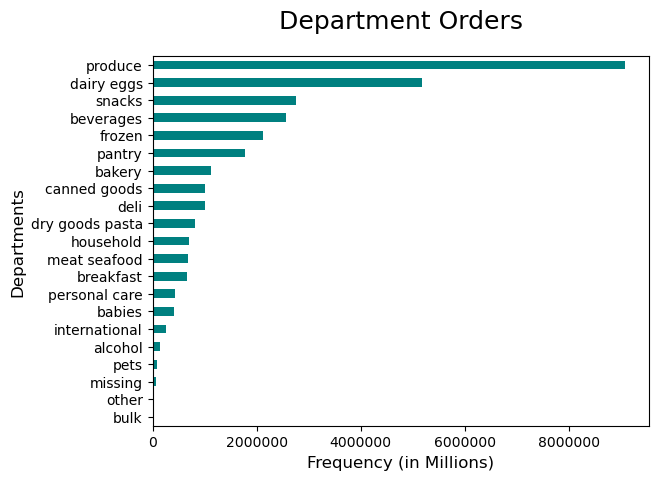

In [69]:
# bar graph for department orders
bar_dept = df_high['department'].value_counts(dropna = False).sort_values().plot(kind = 'barh', rot = 0, color= ['teal'])
plt.title('Department Orders', fontsize = 18, pad=20)
plt.ylabel('Departments', fontsize = 12)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Frequency (in Millions)',  fontsize = 12)

In [70]:
#export department orders
bar_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept.png'))

In [71]:
df_high['department'].describe()

count     30964564
unique          21
top        produce
freq       9079273
Name: department, dtype: object

In [72]:
#check pet owners
df_high.loc[df_high['department'] != 'pets', 'pet_owner'] = 'No'
df_high.loc[df_high['department'] == 'pets', 'pet_owner'] = 'Yes'

/var/folders/zd/y4z70xmn2d94glcjkm8h150h0000gn/T/ipykernel_11101/2363948058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['department'] != 'pets', 'pet_owner'] = 'No'


In [73]:
df_high['pet_owner'].value_counts()

No     30871504
Yes       93060
Name: pet_owner, dtype: int64

In [74]:
#Cross with age
cross_pets = pd.crosstab(df_high['age_category'],df_high['pet_owner'], dropna= False)

In [75]:
cross_pets

pet_owner,No,Yes
age_category,,
Middle Age,12067883,36027
Senior,8170429,25115
Youth,10633192,31918


Text(0.5, 1.0, 'Distribution of Pet-owners ')

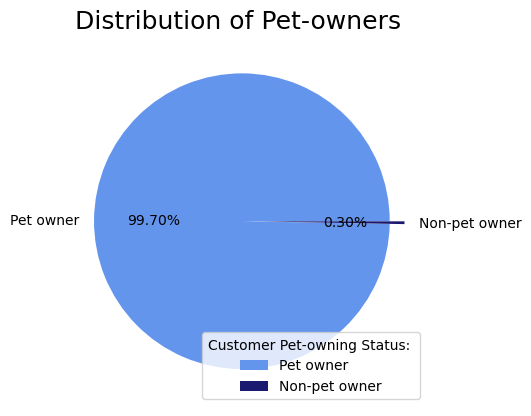

In [76]:
pie_pet_owner = df_high['pet_owner'].value_counts().plot.pie(labels = ['Pet owner','Non-pet owner'], autopct=('%.2f%%'), colors = ['cornflowerblue', 'midnightblue'], label = '', explode = [0,0.1])
pie_pet_owner.legend(title = 'Customer Pet-owning Status: ', loc = 'lower right')
plt.title("Distribution of Pet-owners ", fontsize = '18')

In [77]:
#save pet owner
pie_pet_owner.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_pet_owner.png'))

In [78]:
#Cross with region
cross_pets2 = pd.crosstab(df_high['region_loc'],df_high['pet_owner'], dropna= False)

In [79]:
cross_pets2

pet_owner,No,Yes
region_loc,,
Midwest,7240155,21358
Northeast,5446951,17734
South,10281230,29909
West,7903168,24059


In [80]:
#check alcohol
df_high.loc[df_high['department'] != 'alochol', 'drinker'] = 'No'
df_high.loc[df_high['department'] == 'alcohol', 'drinker'] = 'Yes'
df_high['drinker'].value_counts(dropna = False)

/var/folders/zd/y4z70xmn2d94glcjkm8h150h0000gn/T/ipykernel_11101/1453649356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['department'] != 'alochol', 'drinker'] = 'No'


No     30819937
Yes      144627
Name: drinker, dtype: int64

In [81]:
#Cross with age
cross_drinker = pd.crosstab(df_high['age_category'],df_high['drinker'], dropna= False)
cross_drinker

drinker,No,Yes
age_category,,
Middle Age,12047632,56278
Senior,8158851,36693
Youth,10613454,51656


Text(0.5, 1.0, 'Distribution of alcohol drinkers ')

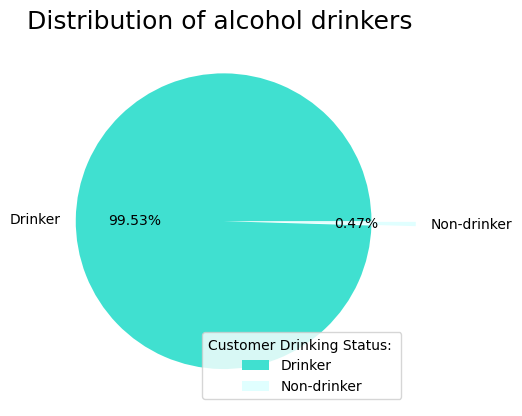

In [82]:
#Pie Chart for drinkers
drinker_pie = df_high['drinker'].value_counts().plot.pie(labels = ['Drinker','Non-drinker'], autopct=('%.2f%%'), colors = ['turquoise', 'lightcyan'], label = '', explode = [0,0.3])
drinker_pie.legend(title = 'Customer Drinking Status: ', loc = 'lower right')
plt.title("Distribution of alcohol drinkers ", fontsize = '18')

In [83]:
#export drinker pie chart- overwhelming majority drink alochol
drinker_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'drinker_pie.png'))

In [84]:
#distribution of orders within 24 hours day
df_high['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      208042
1      109621
2       65691
3       48796
4       50763
5       84418
6      281013
7      863213
8     1659110
9     2363611
10    2649744
11    2614880
12    2495795
13    2539276
14    2567903
15    2535966
16    2413681
17    1982345
18    1551184
19    1193878
20     930909
21     763111
22     607060
23     384554
Name: order_hour_of_day, dtype: int64

In [85]:
#create list for new order_time_period column
result = []

for hour in df_high['order_hour_of_day']:
    if hour in [0, 1, 2, 3, 4, 17, 18, 19, 20, 21, 22, 23]:
        result.append('Night')
    elif hour in [5, 6, 7, 8]:
        result.append('Morning')
    else:
        result.append('Day')


In [86]:
result

['Day',
 'Night',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Night',
 'Morning',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Morning',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Night',
 'Day',
 'Day',
 'Day',
 'Night',
 'Day',
 'Day',
 'Day',
 'Morning',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Night',
 'Day',
 'Day',
 'Day',
 'Day',
 'Morning',
 'Day',
 'Morning',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Morning',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Morning',
 'Day',
 'Day',
 'Night',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Morning',
 'Day',
 'Day',
 'Day',
 'Day',
 'Night',
 'Night',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Night',
 'Day',
 'Day',
 'Morning',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Night',
 'Day',
 'Day',
 'Day',
 'Night',
 'Day',
 'Night',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Day',
 'Mo

In [87]:
df_high['order_time_period'] = result

/var/folders/zd/y4z70xmn2d94glcjkm8h150h0000gn/T/ipykernel_11101/463010034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high['order_time_period'] = result


In [88]:
df_high['order_time_period'].value_counts(dropna = False)

Day        20180856
Night       7895954
Morning     2887754
Name: order_time_period, dtype: int64

Text(0.5, 0, 'Period of Day')

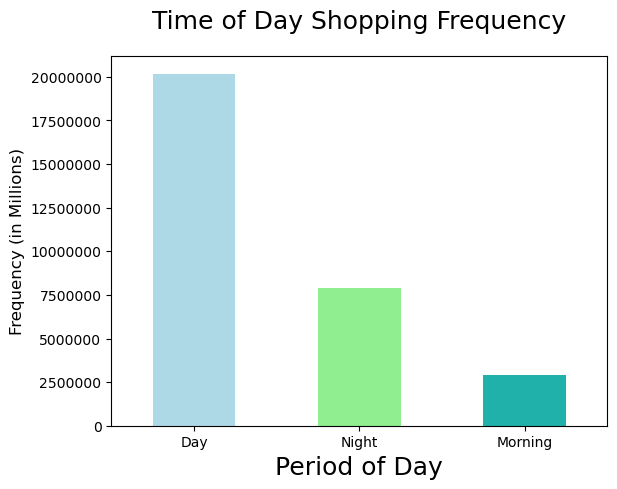

In [89]:
# bar graph for order periods
bar_order_tod = df_high['order_time_period'].value_counts(dropna = False).plot(kind = 'bar', rot = 0, color= ['lightblue', 'lightgreen', 'lightseagreen'])
plt.title('Time of Day Shopping Frequency', fontsize = 18, pad=20)
plt.ylabel('Frequency (in Millions)', fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Period of Day',  fontsize = 18)

In [90]:
#export period of day bar chart
bar_order_tod .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_tod .png'))

In [91]:
df_high['order_hour_of_day'].describe()

count    3.096456e+07
mean     1.341098e+01
std      4.248845e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [92]:
#check most sold product
df_high['product_name'].describe()

count     30964564
unique       49630
top         Banana
freq        453164
Name: product_name, dtype: object

In [93]:
#look at time of day shopping and regions
cross_region_and_tod = pd.crosstab(df_high['order_time_period'],df_high['region_loc'], dropna= False)
cross_region_and_tod

region_loc,Midwest,Northeast,South,West
order_time_period,,,,
Day,4725228,3559748,6706686,5189194
Morning,670594,511923,973296,731941
Night,1865691,1393014,2631157,2006092


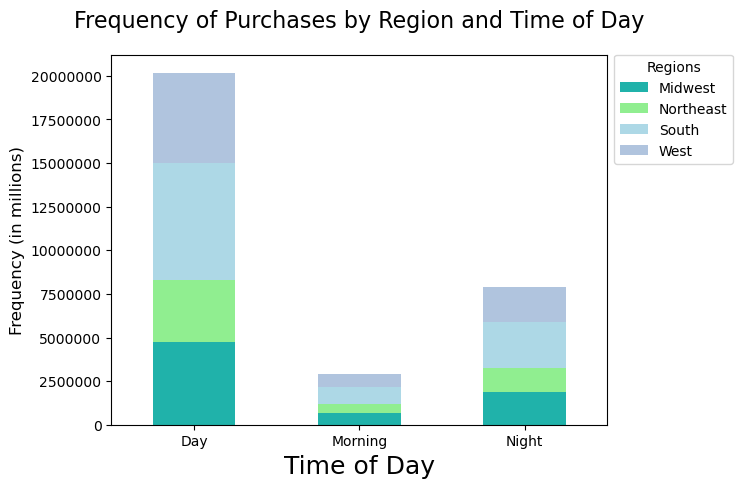

In [94]:
#South region is most busy during all times of day - creating visual
#create bar graph
bar_region_and_tod = cross_region_and_tod.plot(kind = 'bar', stacked =True, rot = 0, color= ['lightseagreen','lightgreen','lightblue', 'lightsteelblue'])
bar_region_and_tod.legend(title='Regions', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Midwest', 'Northeast', 'South','West'])
plt.title('Frequency of Purchases by Region and Time of Day', fontsize = 16, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Time of Day',  fontsize = 18)
plt.ticklabel_format(style='plain', axis='y')

In [95]:
#export region and period of day bar chart
bar_region_and_tod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_and_tod.png'))

In [96]:
#examine departments and regions
cross_region_and_dept = pd.crosstab(df_high['department'],df_high['region_loc'], dropna= False)
cross_region_and_dept

region_loc,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


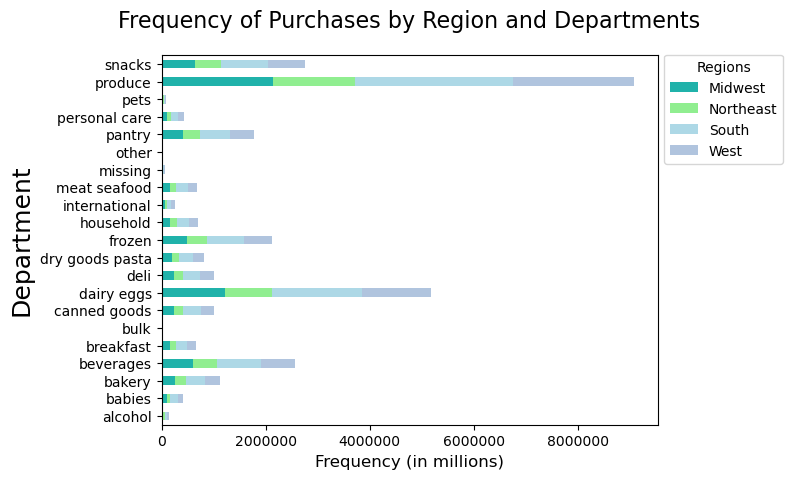

In [97]:
# bar graph for department and regions
bar_region_and_products = cross_region_and_dept.plot(kind = 'barh', stacked=True, rot = 0, color= ['lightseagreen','lightgreen','lightblue', 'lightsteelblue'])
bar_region_and_products.legend(title='Regions', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Midwest', 'Northeast', 'South','West'])
plt.title('Frequency of Purchases by Region and Departments', fontsize = 16, pad=20)
plt.xlabel('Frequency (in millions)', fontsize = 12)
plt.ylabel('Department',  fontsize = 18)
plt.ticklabel_format(style='plain', axis='x')

In [98]:
#export region and period of day bar chart
bar_region_and_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_and_products.png'))

In [99]:
#examine departments and loyalty
cross_loyalty_and_dept = pd.crosstab(df_high['department'],df_high['loyalty_flag'], dropna= False)
cross_loyalty_and_dept

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

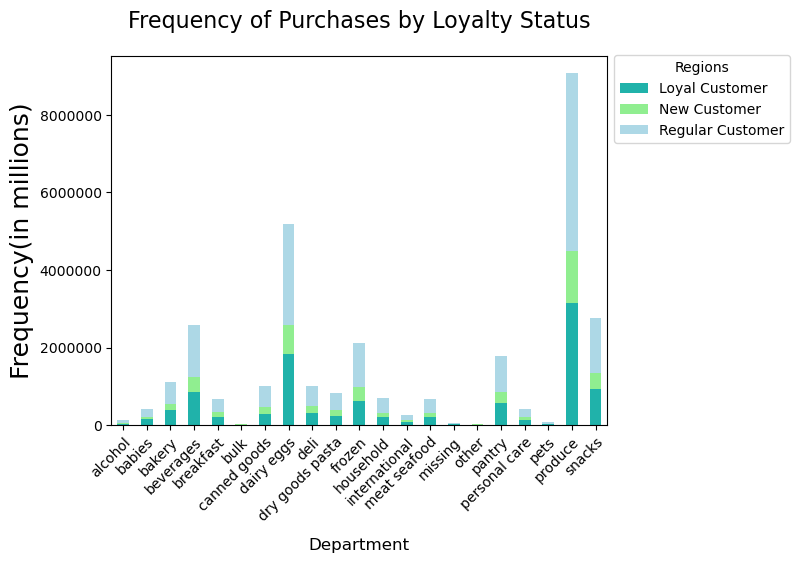

In [100]:
#department purchases by loyalty bar graph
bar_loyalty_and_depts = cross_loyalty_and_dept.plot(kind = 'bar', stacked = True, rot = 0, color= ['lightseagreen','lightgreen','lightblue'])
bar_loyalty_and_depts.legend(title='Regions', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Loyal Customer', 'New Customer', 'Regular Customer'])
plt.title('Frequency of Purchases by Loyalty Status', fontsize = 16, pad=20)
plt.xlabel('Department', fontsize = 12, labelpad=10)
plt.ylabel('Frequency(in millions)',  fontsize = 18)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ha = 'right',rotation_mode='anchor', rotation = 45)

In [101]:
#export dept and loyalty bar chart
bar_loyalty_and_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_and_depts.png'))

In [102]:
#examine loyalty and regions
cross_region_and_loyal = pd.crosstab(df_high['region_loc'],df_high['loyalty_flag'], dropna= False)
cross_region_and_loyal

loyalty_flag,Loyal customer,New customer,Regular customer
region_loc,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


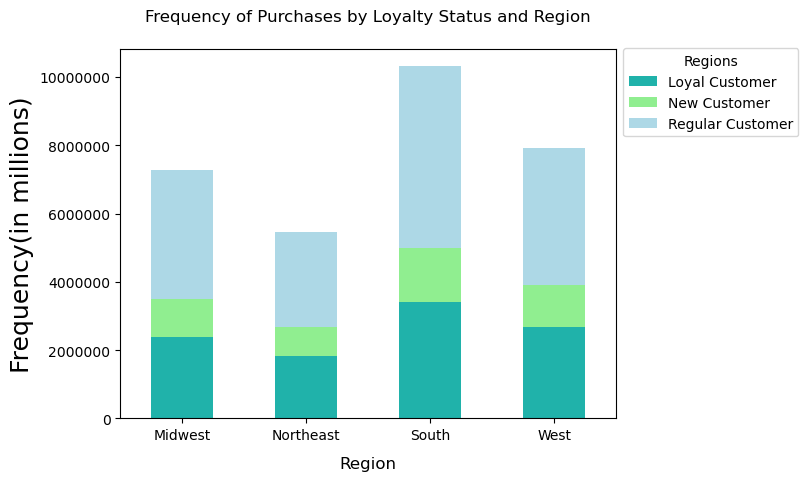

In [103]:
#regionalpurchases by loyalty bar graph
bar_region_and_loyal = cross_region_and_loyal.plot(kind = 'bar', stacked = True,rot = 0, color= ['lightseagreen','lightgreen','lightblue'])
bar_region_and_loyal.legend(title='Regions', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Loyal Customer', 'New Customer', 'Regular Customer'])
plt.title('Frequency of Purchases by Loyalty Status and Region', fontsize = 12, pad=20)
plt.xlabel('Region', fontsize = 12, labelpad=10)
plt.ylabel('Frequency(in millions)',  fontsize = 18)
plt.ticklabel_format(style='plain', axis='y')

In [104]:
#export region and loyalty bar chart
bar_region_and_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_and_loyal.png'))

In [105]:
#examine departments and time periods
cross_dept_time = pd.crosstab(df_high['department'],df_high['order_time_period'], dropna= False)
cross_dept_time

order_time_period,Day,Morning,Night
department,,,
alcohol,103145,7972,33510
babies,253913,50188,106291
bakery,732352,107807,280669
beverages,1706124,231045,634732
breakfast,433414,68714,168722
bulk,21757,3057,8637
canned goods,670549,88259,253266
dairy eggs,3360225,515309,1301648
deli,656584,88984,258266


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

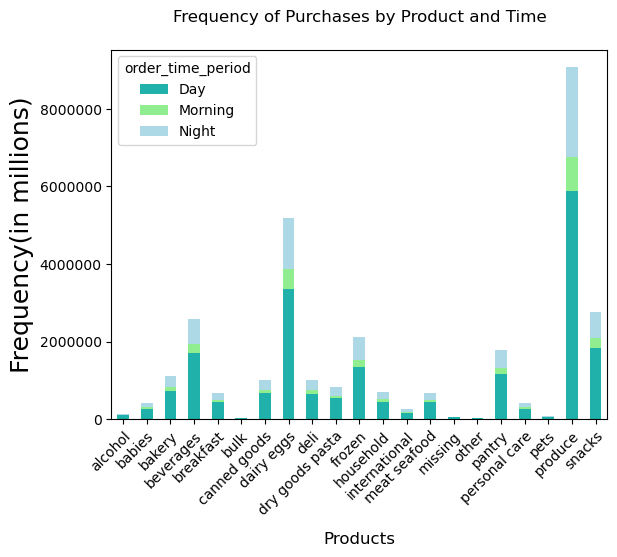

In [106]:
#regionalpurchases by age and time period bar graph
bar_dept_and_time = cross_dept_time.plot(kind = 'bar', stacked = True, rot = 0, color= ['lightseagreen','lightgreen','lightblue'])
bar_region_and_loyal.legend(title='Regions', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Loyal Customer', 'New Customer', 'Regular Customer'])
plt.title('Frequency of Purchases by Product and Time', fontsize = 12, pad=20)
plt.xlabel('Products', fontsize = 12, labelpad=10)
plt.ylabel('Frequency(in millions)',  fontsize = 18)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ha = 'right',rotation_mode='anchor', rotation = 45)

In [107]:
#export depts and time shopping bar chart
bar_dept_and_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_and_time.png'))

In [108]:
#examine age group and time periods
cross_age_time = pd.crosstab(df_high['age_category'],df_high['order_time_period'], dropna= False)
cross_age_time

order_time_period,Day,Morning,Night
age_category,,,
Middle Age,7888865,1124900,3090145
Senior,5323295,773040,2099209
Youth,6968696,989814,2706600


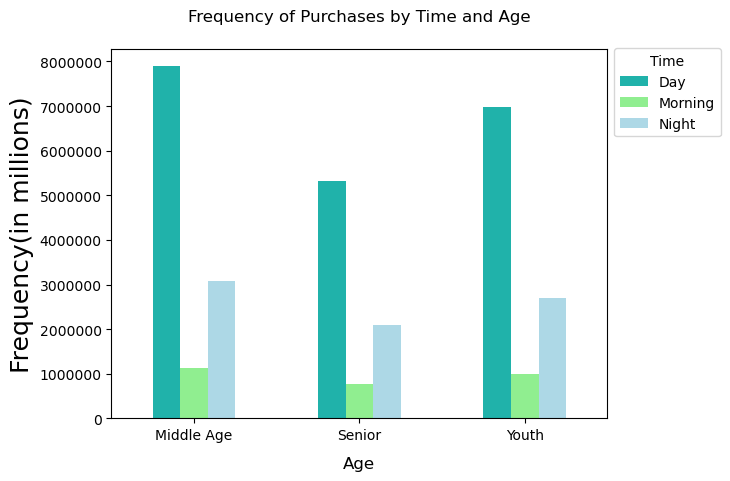

In [109]:
#purchases by age and time period bar graph
bar_age_and_time = cross_age_time.plot(kind = 'bar', rot = 0, color= ['lightseagreen','lightgreen','lightblue'])
bar_age_and_time.legend(title='Time', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Frequency of Purchases by Time and Age', fontsize = 12, pad=20)
plt.xlabel('Age', fontsize = 12, labelpad=10)
plt.ylabel('Frequency(in millions)',  fontsize = 18)
plt.ticklabel_format(style='plain', axis='y')

In [110]:
#export age and time shopping bar chart
bar_age_and_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_and_time.png'))

In [111]:
#examine age group and days of week periods
cross_age_dow = pd.crosstab(df_high['age_category'],df_high['orders_day_of_week'], dropna= False)
cross_age_dow

orders_day_of_week,0,1,2,3,4,5,6
age_category,,,,,,,
Middle Age,2301009,2112438,1583124,1431181,1415669,1576837,1683652
Senior,1566244,1417495,1065170,978350,956161,1066115,1146009
Youth,2041357,1881753,1376412,1260004,1253164,1390777,1461643


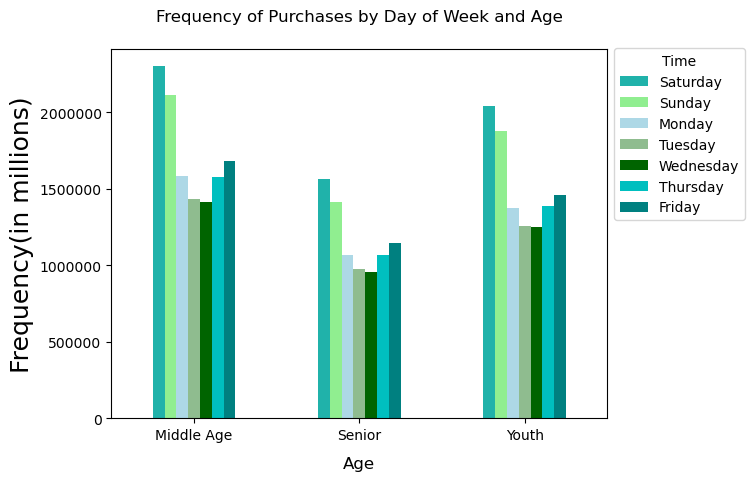

In [112]:
#purchases by age and dow bar graph
bar_age_and_dow = cross_age_dow.plot(kind = 'bar', rot = 0, color= ['lightseagreen','lightgreen','lightblue','darkseagreen','darkgreen','c','teal'])
bar_age_and_dow.legend(title='Time', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.title('Frequency of Purchases by Day of Week and Age', fontsize = 12, pad=20)
plt.xlabel('Age', fontsize = 12, labelpad=10)
plt.ylabel('Frequency(in millions)',  fontsize = 18)
plt.ticklabel_format(style='plain', axis='y')

In [113]:
#export age and day of week shopping bar chart
bar_age_and_dow .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_and_dow.png'))

In [114]:
#check prices 
df_high.prices.describe()

count    3.096456e+07
mean     1.193352e+01
std      4.913444e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [115]:
df_high.price_range_loc

0            Mid-range product
1            Mid-range product
2           High-range product
3           High-range product
4            Mid-range product
                   ...        
32404843     Low-range product
32404844     Low-range product
32404845     Low-range product
32404846     Low-range product
32404847     Low-range product
Name: price_range_loc, Length: 30964564, dtype: object

In [116]:
#examine price range and departments
cross_prices_dept = pd.crosstab(df_high['department'],df_high['price_range_loc'], dropna= False)
cross_prices_dept

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,33046,111581
babies,0,121484,288908
bakery,0,274986,845842
beverages,0,814697,1757204
breakfast,0,209185,461665
bulk,0,1181,32270
canned goods,0,281711,730363
dairy eggs,4877,1370908,3801397
deli,0,299220,704614


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

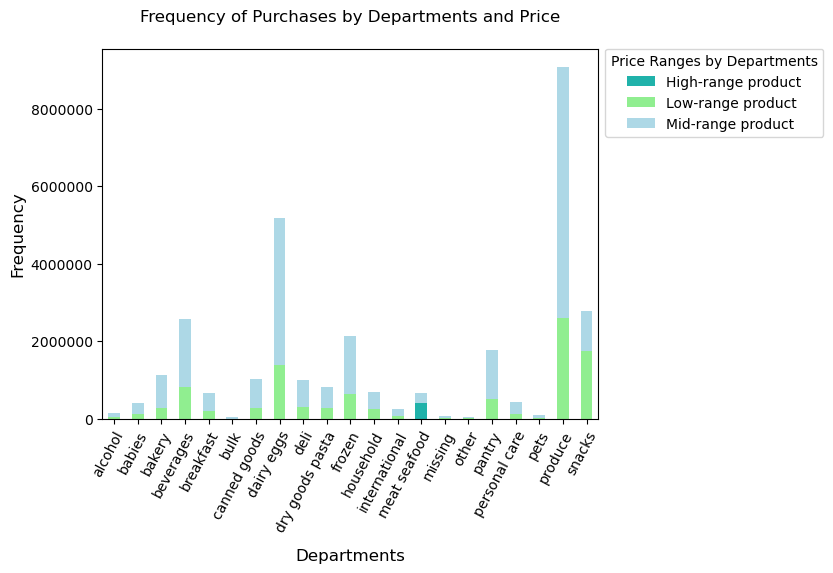

In [117]:
#price and dept comparions graph
bar_price_and_dept = cross_prices_dept.plot(kind = 'bar', stacked = True, rot = 0, color= ['lightseagreen','lightgreen','lightblue'])
bar_price_and_dept.legend(title='Price Ranges by Departments', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Frequency of Purchases by Departments and Price', fontsize = 12, pad=20)
plt.xlabel('Departments', fontsize = 12, labelpad=10)
plt.ylabel('Frequency',  fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ha = 'right',rotation_mode='anchor', rotation = 62)

In [118]:
#export age and day of week shopping bar chart
bar_price_and_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_and_dept.png'))

In [119]:
#examine income and region
cross_income_region = pd.crosstab(df_high['region_loc'],df_high['income_flag'], dropna= False)
cross_income_region

income_flag,High,Low,Middle
region_loc,,,
Midwest,1763002,1974266,3524245
Northeast,1308807,1486808,2669070
South,2442801,2849538,5018800
West,1886804,2209921,3830502


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

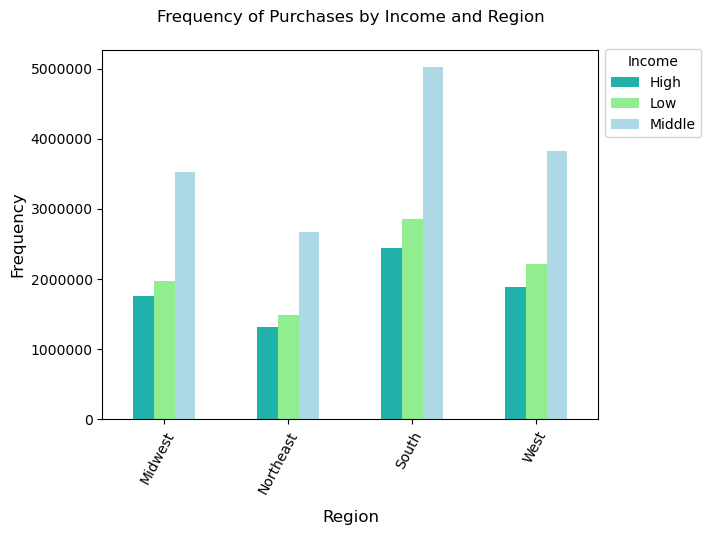

In [120]:
#income and region bar graph
bar_income_and_region = cross_income_region.plot(kind = 'bar', rot = 0, color= ['lightseagreen','lightgreen','lightblue'])
bar_income_and_region.legend(title='Income', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Frequency of Purchases by Income and Region', fontsize = 12, pad=20)
plt.xlabel('Region', fontsize = 12, labelpad=10)
plt.ylabel('Frequency',  fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ha = 'right',rotation_mode='anchor', rotation = 62)

In [121]:
#export income and region
bar_income_and_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_and_region.png'))

In [122]:
#examine family and products
cross_family_products = pd.crosstab(df_high['family_status'],df_high['department'], dropna= False)
cross_family_products

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
family_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,11859,34351,95735,220879,56590,2676,84268,442602,86749,70251,...,58446,21814,57621,5064,2842,151891,36313,8025,777094,236244
living with parents and siblings,8379,19381,53684,119107,33198,1633,48477,250207,48119,39542,...,33349,12394,32344,3317,1815,85845,20201,5338,430539,131310
married,99421,287683,785749,1807453,471220,23818,712577,3632599,702333,578298,...,495150,179136,476559,45516,23882,1252956,297900,64120,6373293,1944658
single,24968,68977,185660,424462,109842,5324,166752,851774,166633,134045,...,112912,42647,108257,10871,5872,292013,69892,15577,1498347,454194


(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

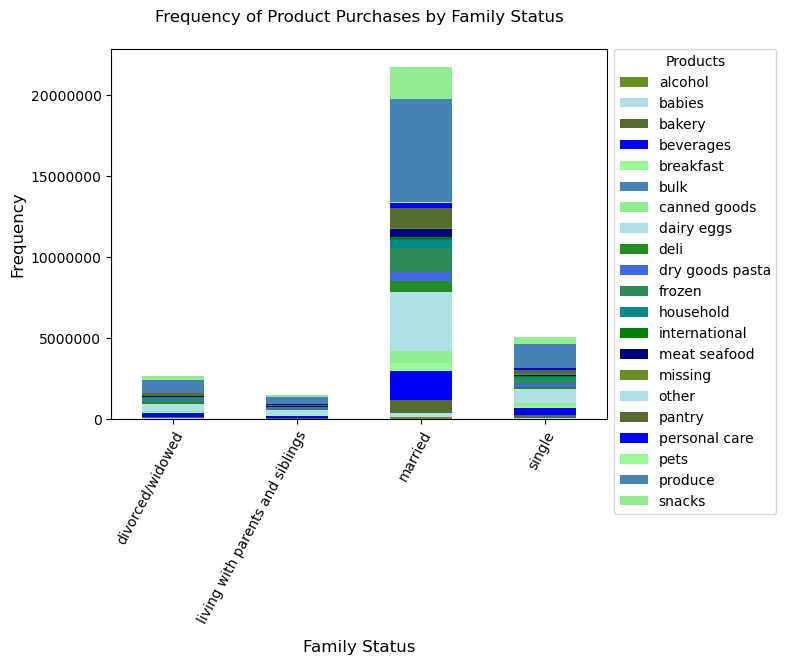

In [123]:
#income and region bar graph
bar_family_departments = cross_family_products.plot(kind = 'bar', stacked=True,rot = 0, color= ['olivedrab','powderblue','darkolivegreen','blue','palegreen','steelblue','lightgreen','powderblue','forestgreen','royalblue','seagreen','darkcyan','green','navy'])
bar_family_departments.legend(title='Products', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Frequency of Product Purchases by Family Status', fontsize = 12, pad=20)
plt.xlabel('Family Status', fontsize = 12, labelpad=10)
plt.ylabel('Frequency',  fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ha = 'right',rotation_mode='anchor', rotation = 62)

In [124]:
#export family status and products
bar_family_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_departments.png'))

In [125]:
#examine family and regions
cross_family_region = pd.crosstab(df_high['family_status'],df_high['region_loc'], dropna= False)
cross_family_region

region_loc,Midwest,Northeast,South,West
family_status,,,,
divorced/widowed,617198,478767,877314,671992
living with parents and siblings,351435,256430,505457,367850
married,5087262,3853773,7223749,5578927
single,1205618,875715,1704619,1308458


(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

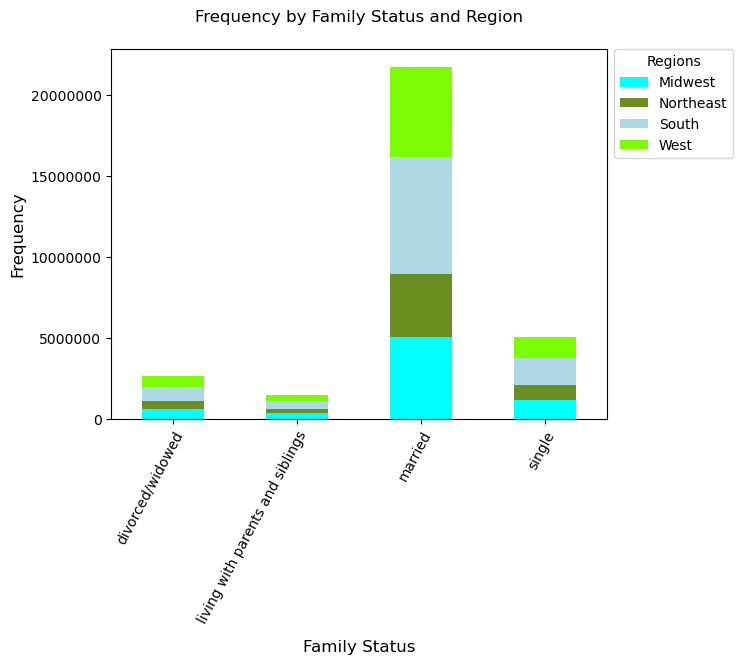

In [126]:
#family and region bar graph
bar_family_region = cross_family_region.sort_index().plot(kind = 'bar', stacked=True,rot = 0, color= ['cyan','olivedrab','lightblue','lawngreen'])
bar_family_region.legend(title='Regions', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Frequency by Family Status and Region', fontsize = 12, pad=20)
plt.xlabel('Family Status', fontsize = 12, labelpad=10)
plt.ylabel('Frequency',  fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ha = 'right',rotation_mode='anchor', rotation = 62)

In [127]:
#export family status and region
bar_family_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_region.png'))